# Road Accident Prediction And Classification
###### Abdul Wahed and Abrar Hashmi        


### Introduction



## Importing Data and cleaning
- We import three files to perform analysis on this data. This data is consist of three files that are accidents, casualities and vehicles. However, we have one more file which is general information about the traffic count for year 2000 to 2015. We can use general traffic information data for machine learning part.

In [2]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
#from mpl_toolkits.basemap import Basemap
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
accidents = pd.read_csv(r'Accidents.csv',index_col='Accident_Index')
vehicles= pd.read_csv(r'Vehicles.csv', error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)
casualties = pd.read_csv(r'Casualties.csv', error_bad_lines=False, index_col='Accident_Index', warn_bad_lines=False)
print('Loaded')

# accidents=accidents.head(200000)

# vehicles=vehicles.head(200000)

# casualties=casualties.head(200000)

Loaded


In [5]:
accidents.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,525680,178240,-0.191170,51.489096,1,2,1,1,04/01/2005,3,...,0,1,1,2,2,0,0,1,1,E01002849
200501BS00002,524170,181650,-0.211708,51.520075,1,3,1,1,05/01/2005,4,...,0,5,4,1,1,0,0,1,1,E01002909
200501BS00003,524520,182240,-0.206458,51.525301,1,3,2,1,06/01/2005,5,...,0,0,4,1,1,0,0,1,1,E01002857
200501BS00004,526900,177530,-0.173862,51.482442,1,3,1,1,07/01/2005,6,...,0,0,1,1,1,0,0,1,1,E01002840
200501BS00005,528060,179040,-0.156618,51.495752,1,3,1,1,10/01/2005,2,...,0,0,7,1,2,0,0,1,1,E01002863


In [6]:
accidents = accidents.join(vehicles, how='outer')

## Identifying Missing Values

In this particular dataset, there are two types of missing values '-1' and 'Nan'. We will invesitigate each column with total missing values.
We will not be imputing any mean or median value since the dataset is big enough to perform analysis.

In [7]:
accidents.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR','LSOA_of_Accident_Location',
                'Junction_Control' ,'2nd_Road_Class'], axis=1, inplace=True)
accidents['Date_time'] =  accidents['Date'] +' '+ accidents['Time']

for col in accidents.columns:
    accidents = (accidents[accidents[col]!=-1])
    #print(col ,' ' , x)
for col in casualties.columns:
    casualties = (casualties[casualties[col]!=-1])

    accidents['Date_time'] = pd.to_datetime(accidents.Date_time)
accidents.drop(['Date','Time'],axis =1 , inplace=True)
accidents.dropna(inplace=True)

Our dataset is clean to do some analysis. We would be using very few columns to do analysis since the dataset is fairly large.

# Data Visualization

#### The first thing we can do is to find out about accidents time to get intution and some driver's age who are involved in the accident.
- We can find out the number of accidents on the days of a week.
- We can find out about the accidents number using hours of the day.
- Finding out about the age of driver can tell us more about the accidents.

Text(0.5, 0, '0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday')

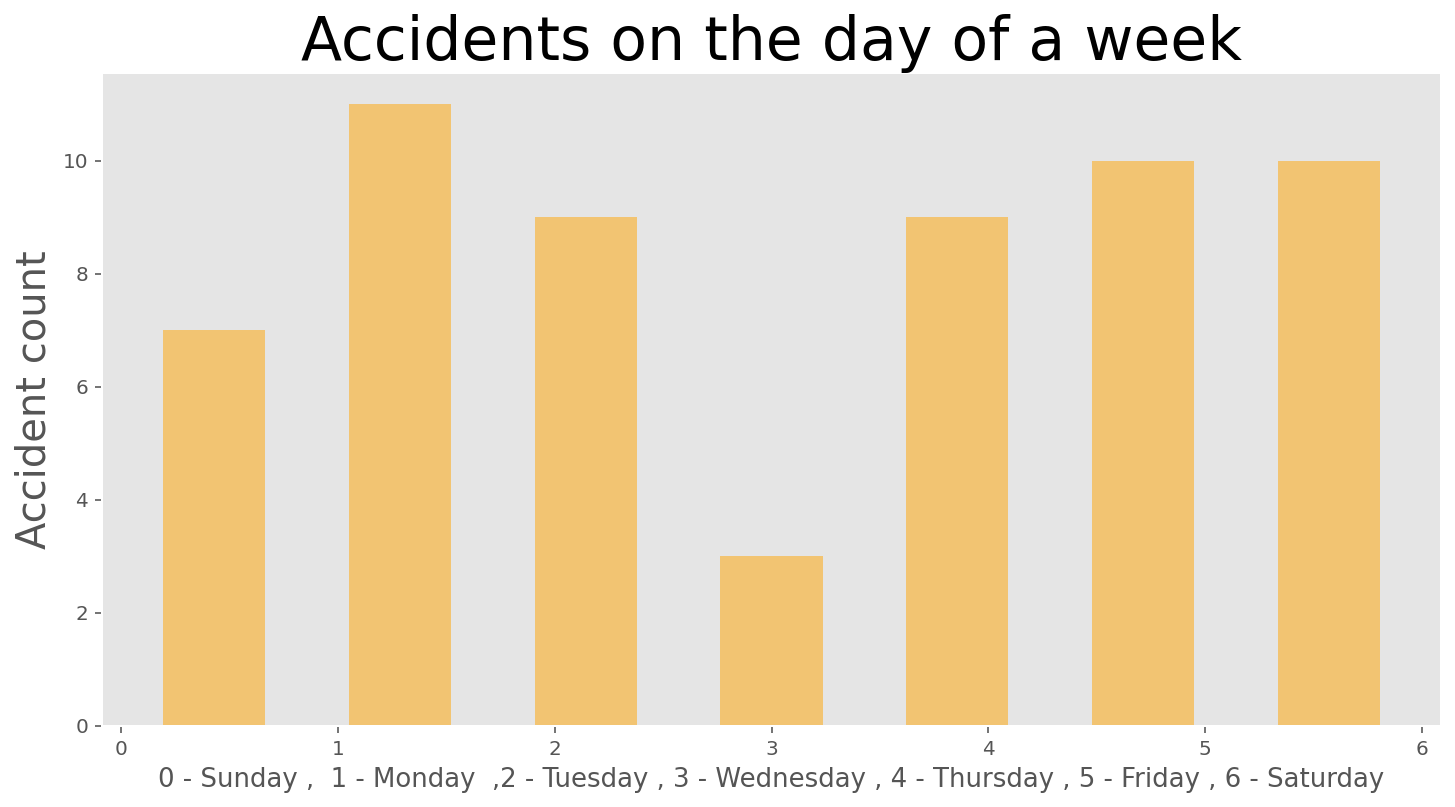

In [8]:
plt.figure(figsize=(12,6))
accidents.Date_time.dt.dayofweek.hist(bins=7,rwidth=0.55,alpha=0.5, color= 'orange')
plt.title('Accidents on the day of a week' , fontsize= 30)
plt.grid(False)
plt.ylabel('Accident count' , fontsize = 20)
plt.xlabel('0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday' , fontsize = 13)

As we can see that thursday has the highest amount of accidents in this dataset from 2005 to 2015. We have to keep in mind that accidents numbers could be depending on traffic amount on particular day.

Text(0, 0.5, 'Accident count')

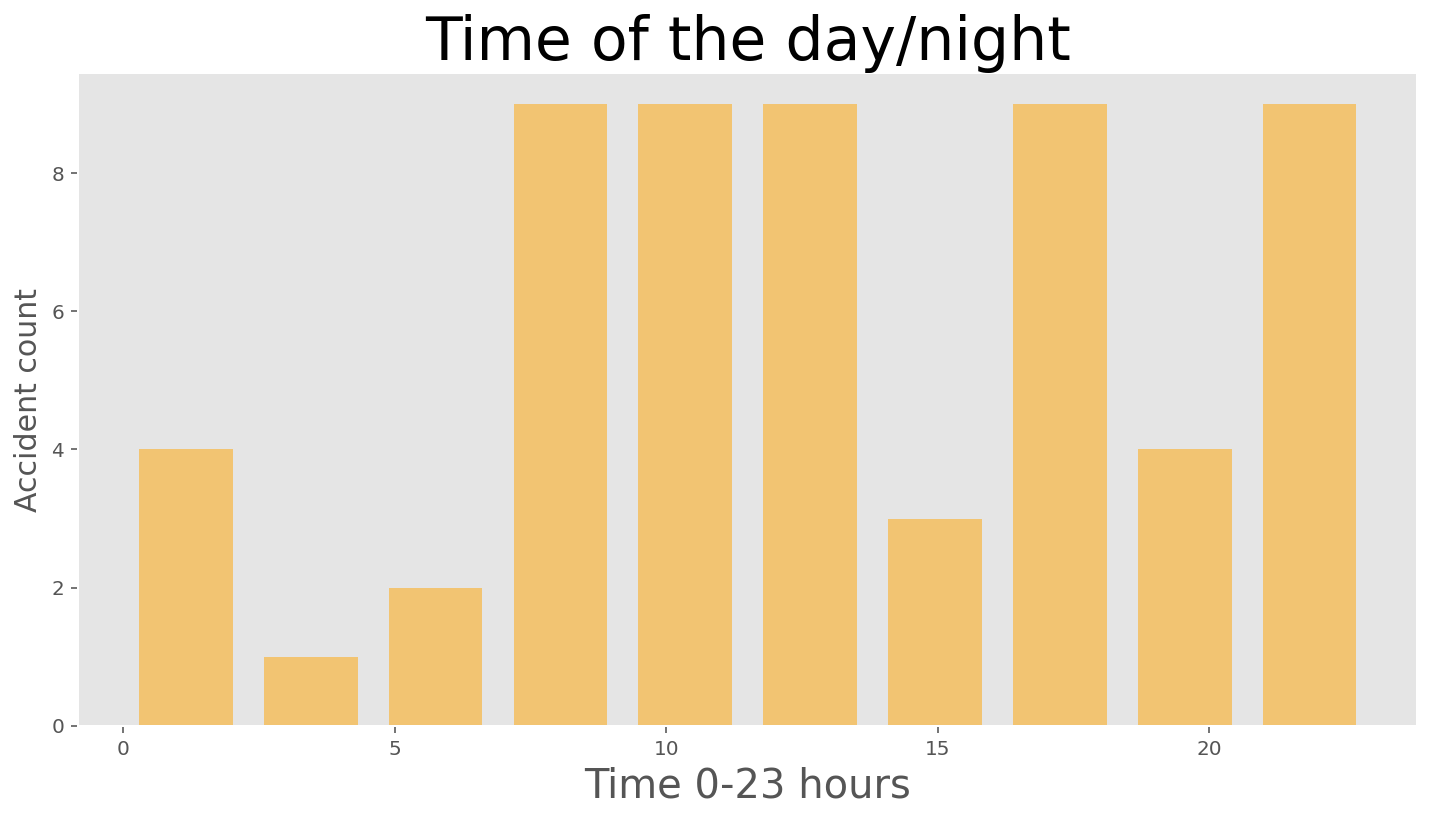

In [9]:
plt.figure(figsize=(12,6))
accidents.Date_time.dt.hour.hist(rwidth=0.75,alpha =0.50, color= 'orange')
plt.title('Time of the day/night',fontsize= 30)
plt.grid(False)
plt.xlabel('Time 0-23 hours' , fontsize = 20)
plt.ylabel('Accident count' , fontsize = 15)


We found out that the most of accidents happened around after noon. We can assume that this time of the day has the most traffic moving such as people leaving from work.


#### Age band of casualities

In this dataset, age band is grouped in 11 different codes. We will create the labels and pass it to the plot as xticks so we can have idea about the bins representation.

Text(0.5, 0, 'Age of Drivers')

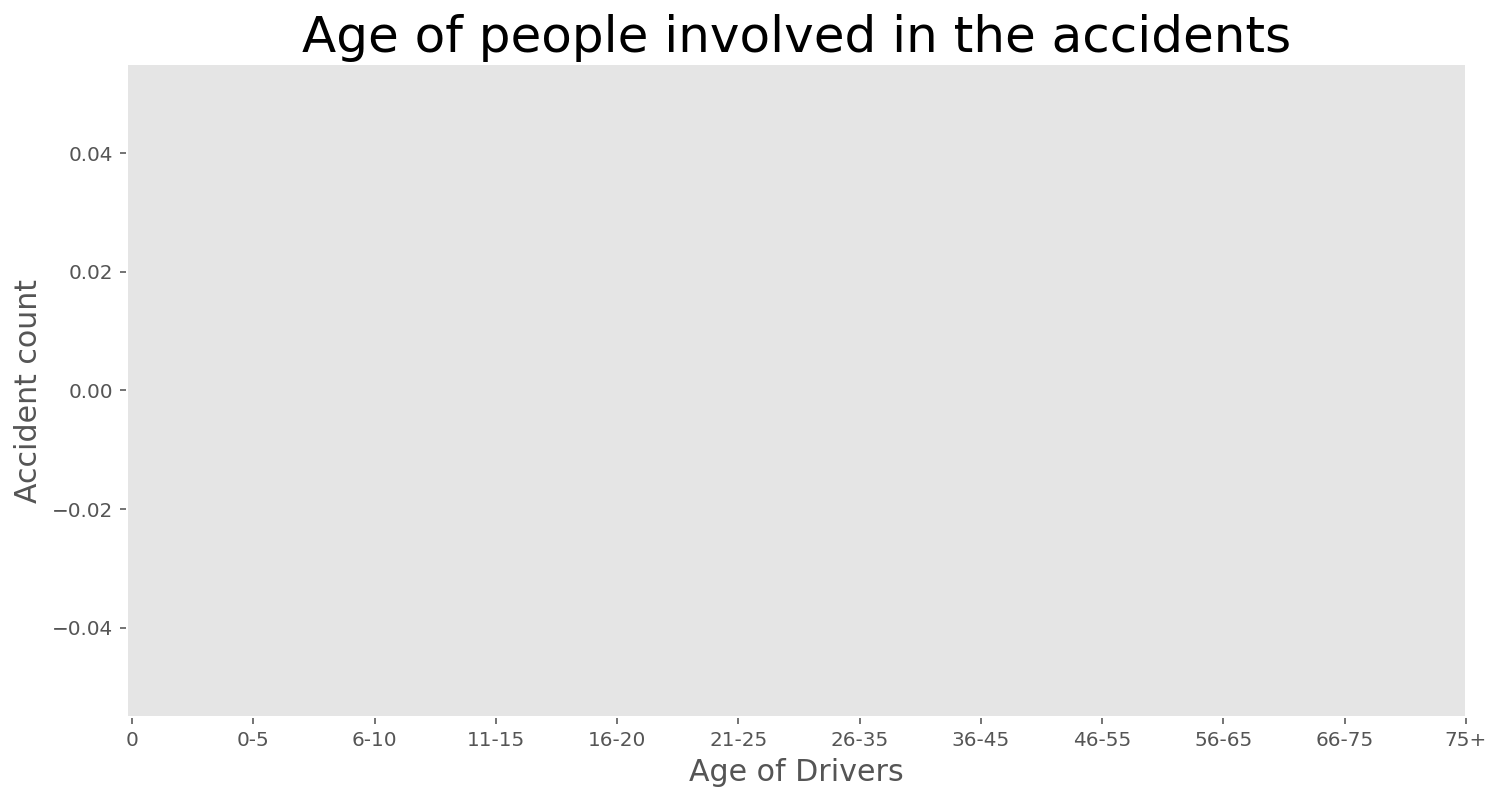

In [10]:
objects = ['0','0-5','6-10','11-15','16-20','21-25','26-35',
          '36-45', '46-55','56-65','66-75','75+']

plt.figure(figsize=(12,6))
casualties.Age_Band_of_Casualty.hist(bins = 11,alpha=0.5,rwidth=0.90, color= 'red',)
plt.title('Age of people involved in the accidents', fontsize = 25)
plt.grid(False)
y_pos = np.arange(len(objects))
plt.xticks(y_pos , objects)
plt.ylabel('Accident count' , fontsize = 15)
plt.xlabel('Age of Drivers', fontsize = 15,)

This is very interesting fact about this dataset. Most of the drivers age is around 225 to 35 who are involved in the accident. However, we do not know the number of drivers with age 25 to 35 on the road compare to other ages. Intutively, I would assume that the driver with age 25 to 35 are more in the number of drivers with different age.

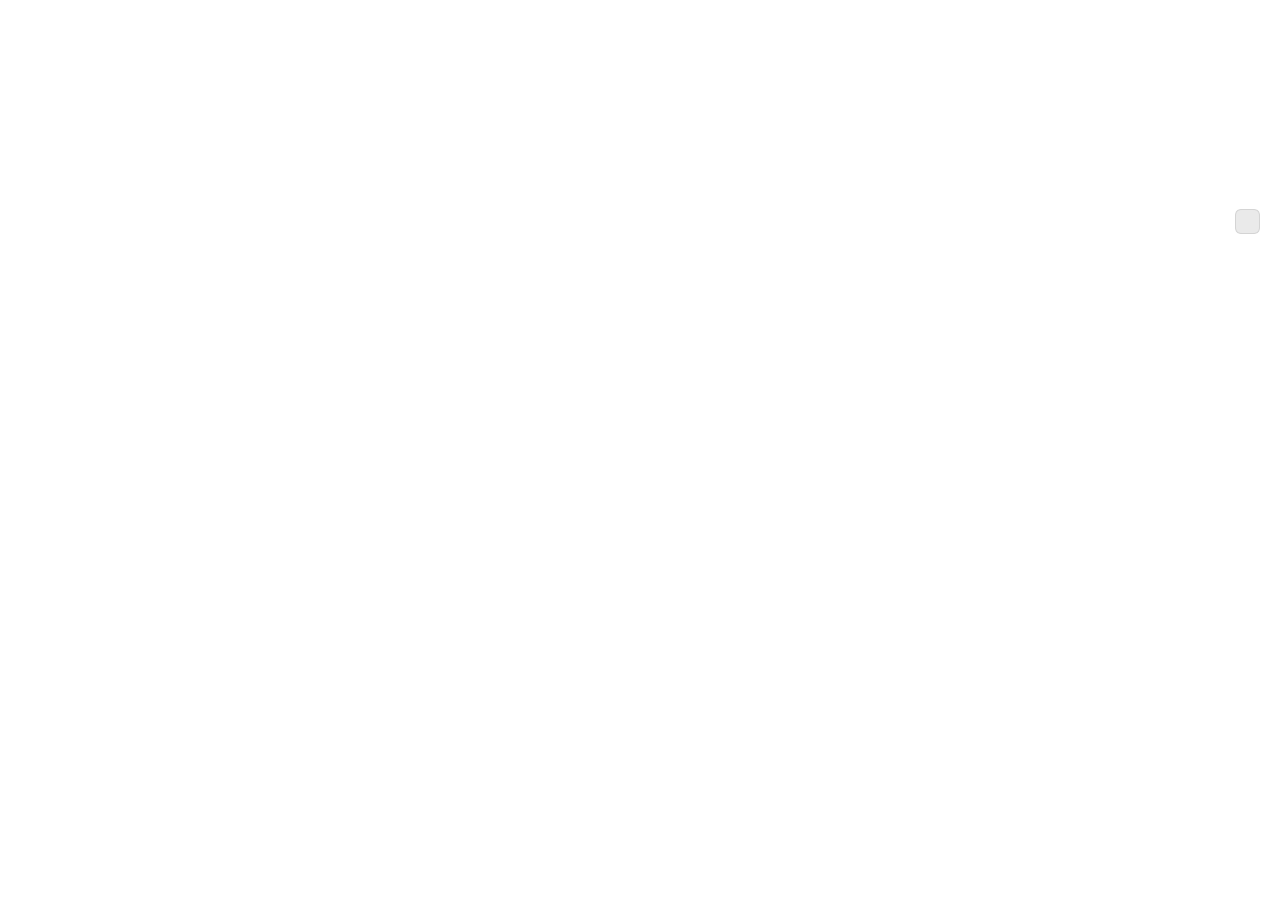

In [11]:
speed_zone_accidents = accidents.loc[accidents['Speed_limit'].isin(['20' ,'30' ,'40' ,'50' ,'60' ,'70'])]
speed = speed_zone_accidents.Speed_limit.value_counts()

explode = [0.0] * len(speed)
plt.figure(figsize=(10,8))
plt.pie(speed.values, labels=None, autopct='%.1f', pctdistance=0.8, labeldistance=1.9, 
        explode=explode, shadow=False, startangle=160, textprops={'fontsize': 15})
plt.axis('equal')
plt.legend(speed.index, bbox_to_anchor=(1,0.7), loc="center right", fontsize=15, 
           bbox_transform=plt.gcf().transFigure)


Most of the accidents occured on the road where the speed limit is 30. I was expecting more accidents on highway or major roadways. Some of the accidents could be cause of stop sign, changing lanes or turning into parking lot etc.

## Co-relation between variables

Since our dataset is in numeric values. We can findout correlation between columns.

<AxesSubplot:>

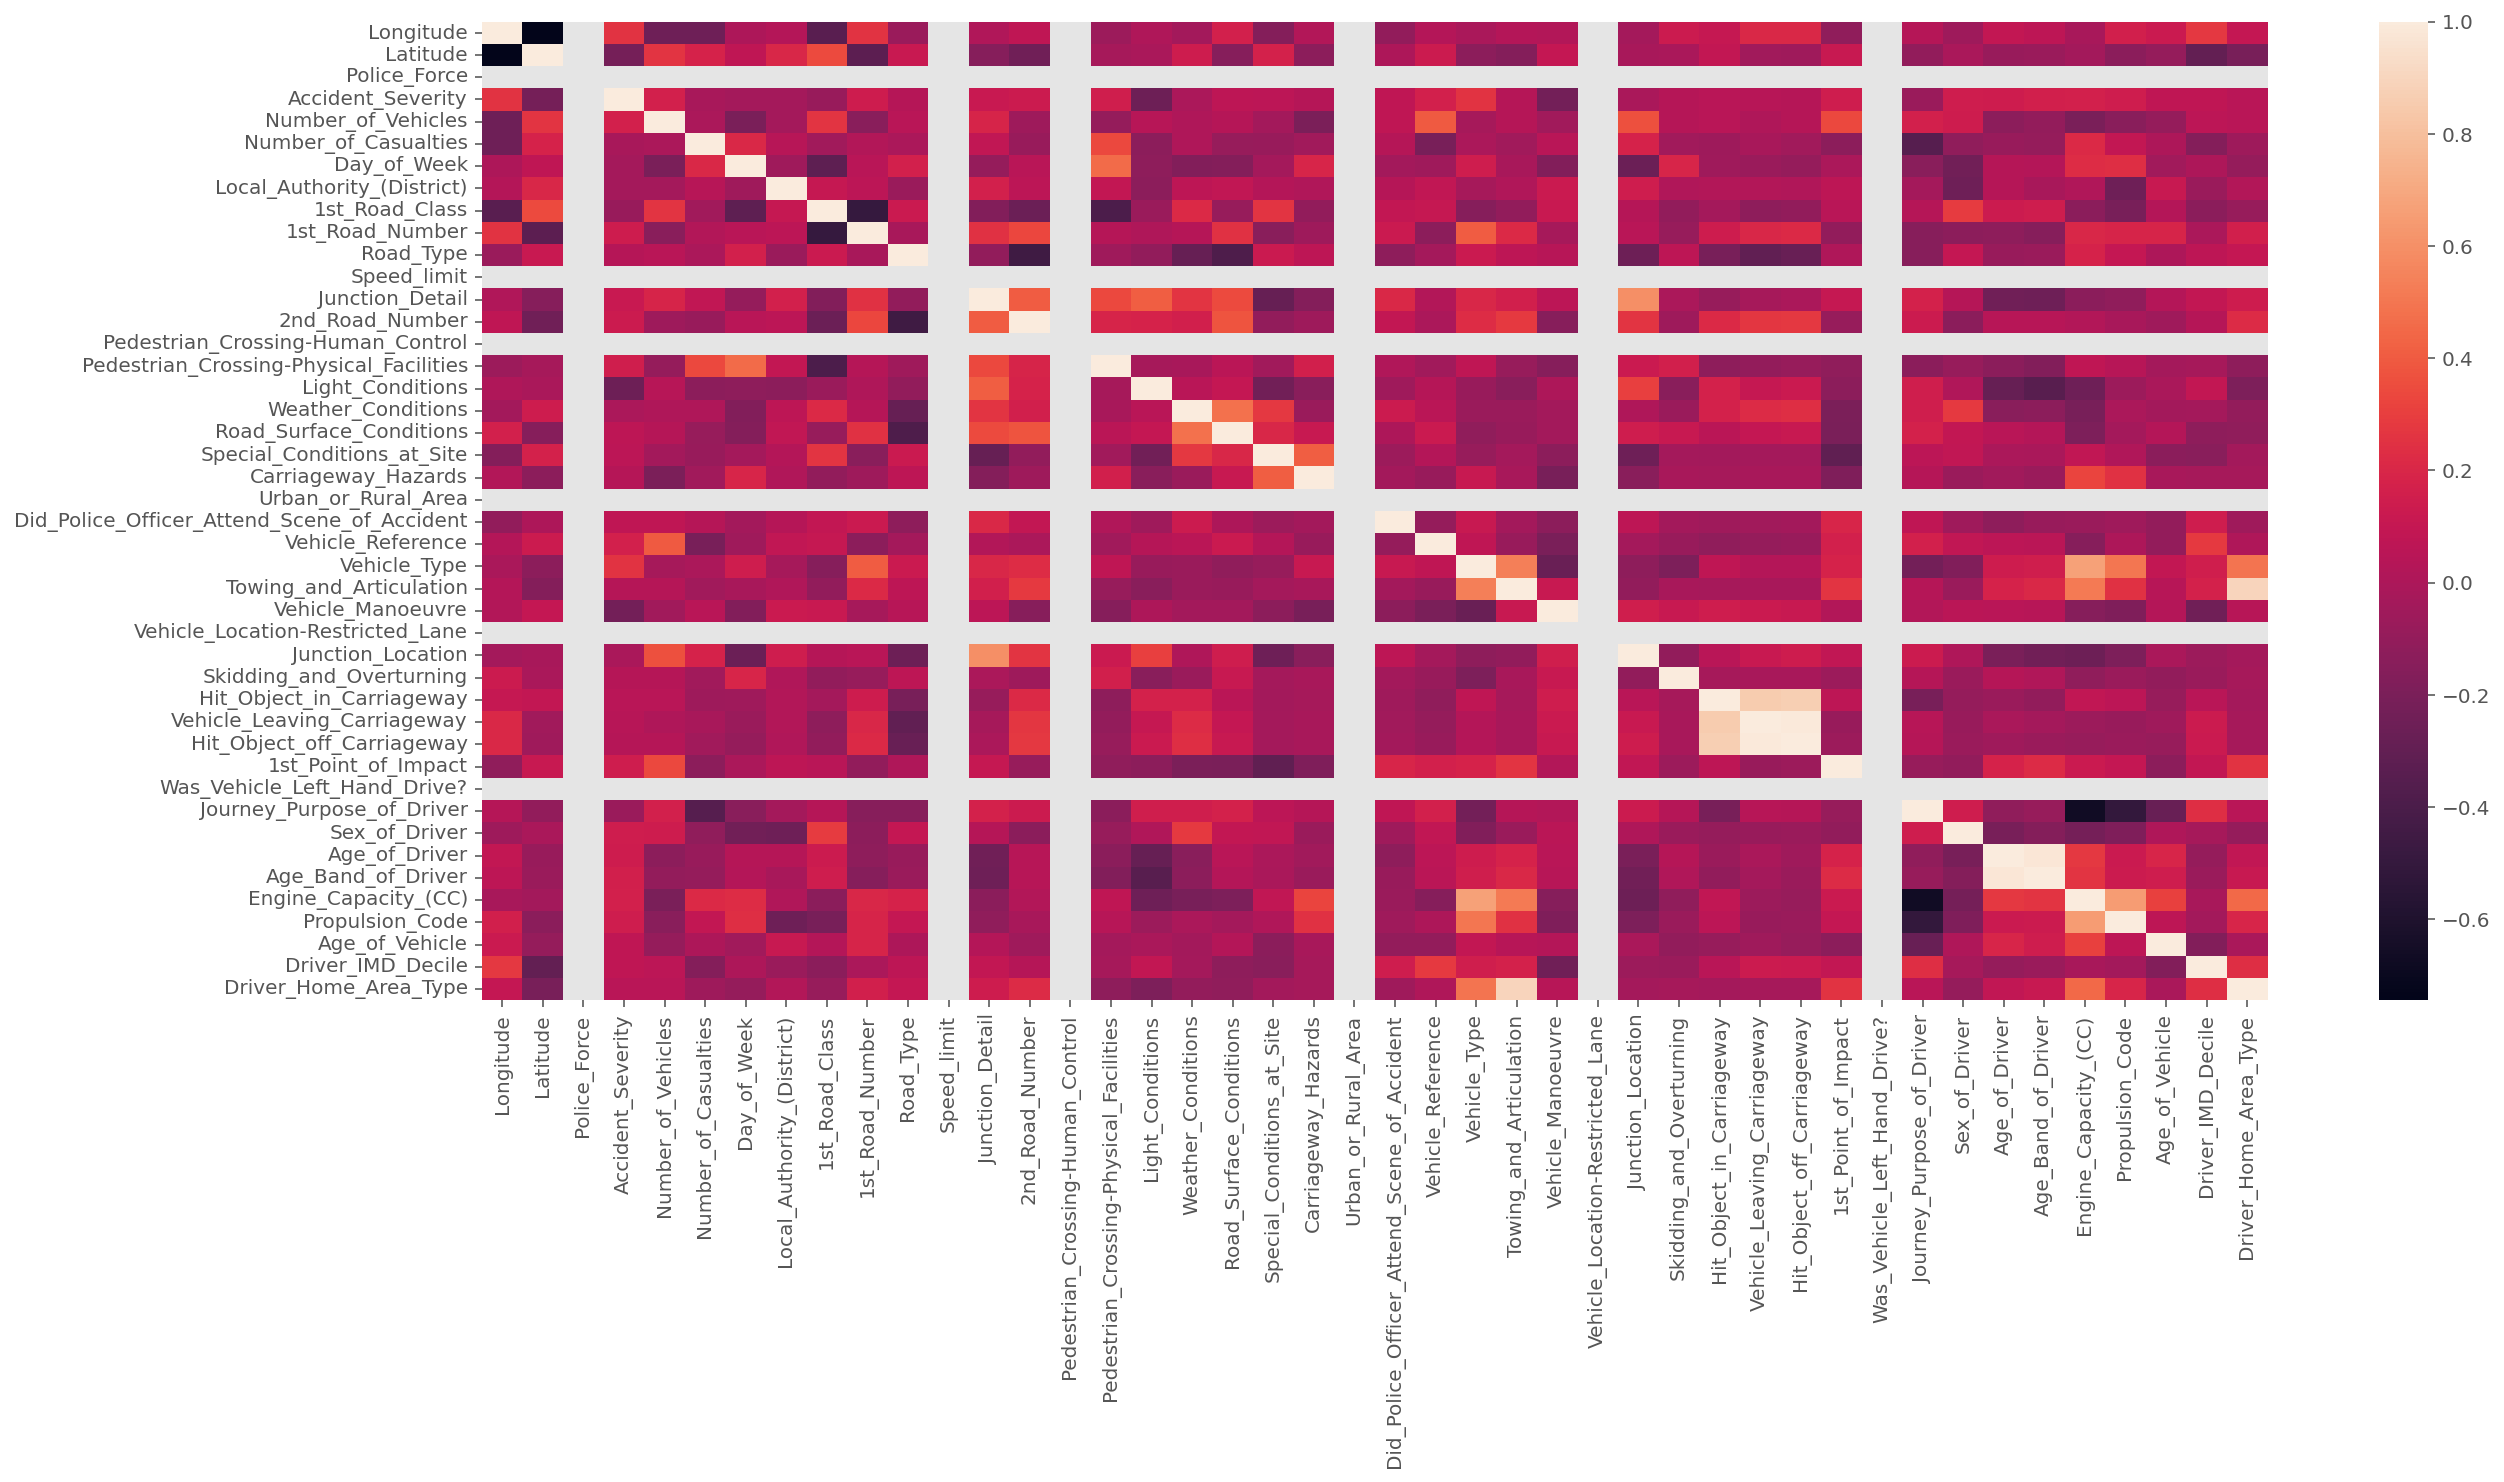

In [12]:
corr =  accidents.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr)

As we see that there is not so much strong correlations between any variables. I was expecting weather condition to be strong correlation with any of the variable. 
- There is only one postiive strong correlation between speed limit and Urban or Rural Area. 

In [13]:
accidents_2014 = accidents[accidents.Date_time.dt.year ==2014]
accidents_2014_01 = accidents_2014[accidents_2014.Accident_Severity == 1]
accidents_2014_02 = accidents_2014[accidents_2014.Accident_Severity == 2]
accidents_2014_03 = accidents_2014[accidents_2014.Accident_Severity == 3]

As we can see that most of fatal accidents happened locally within cities instead on highways. It could be the reason of the traffic is more congested locally than on highways.

## Machine Learning

We will be looking at different columns to figure out predicting about the accidents severity. After we can predict the accident severity, we can make some recommendation to law enforcement for looking into this and be prepared for the future. We can also have more emergency medical services available for those situations.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import log_loss

## Normalize the Data
There are few columns that we will standarize, so it would not effect negatively on our machine learning algorithms. Age of driver is from 18 to 88 in the dataset and we can normalize it. Also, the age of vehicle is also from 0 to 100 and it can skew the performance of your machine learning algorithm and we will normalize this predictor too.

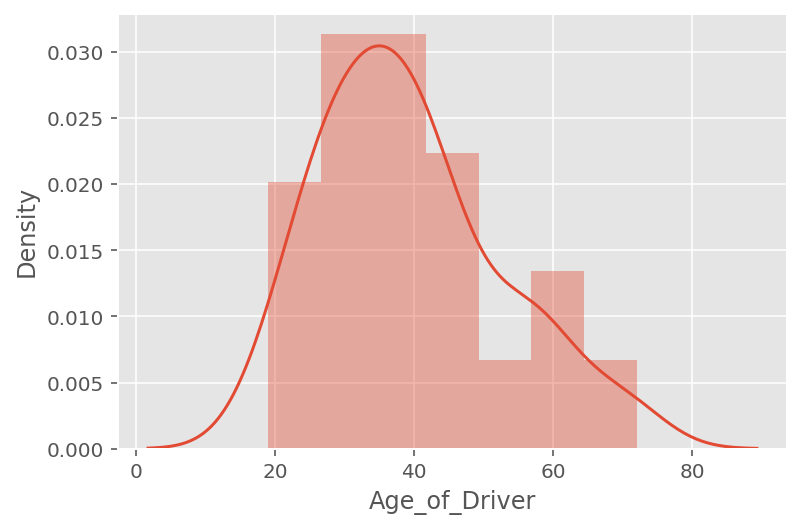

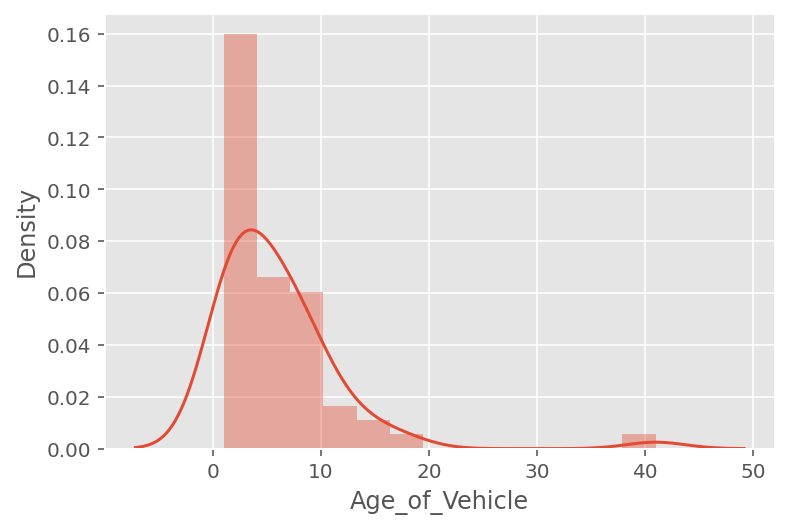

<Figure size 432x288 with 0 Axes>

In [15]:
sns.distplot(accidents['Age_of_Driver']);
fig = plt.figure()
sns.distplot(accidents['Age_of_Vehicle']);
fig = plt.figure()

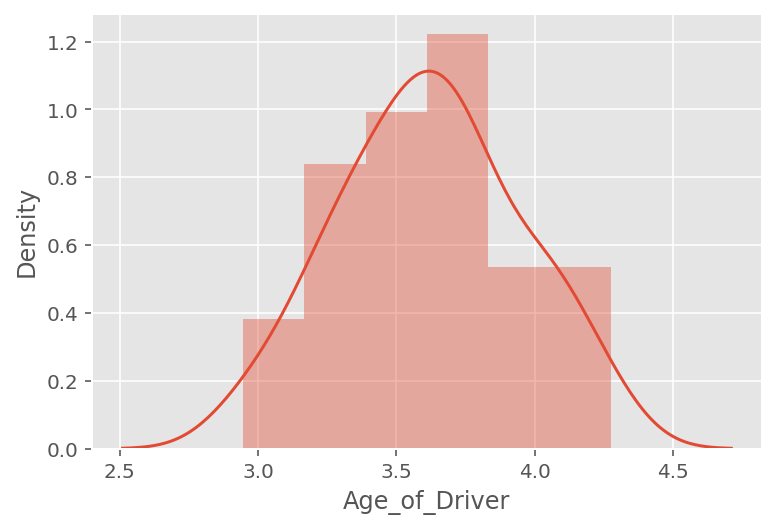

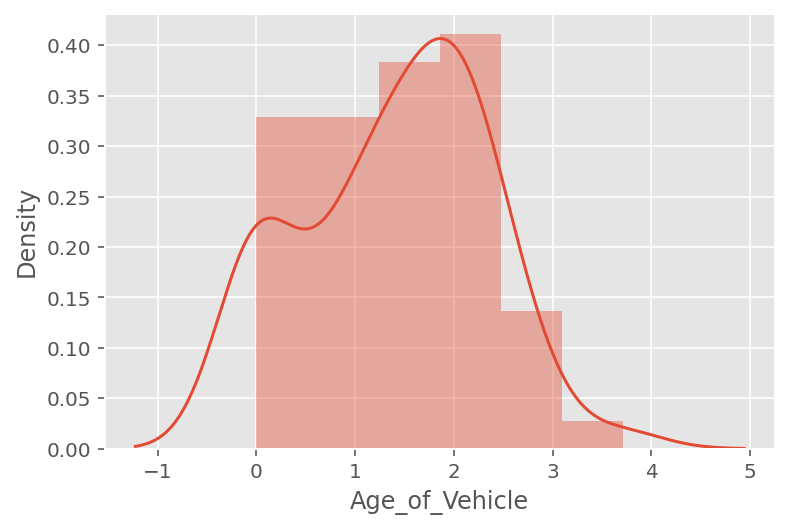

<Figure size 432x288 with 0 Axes>

In [16]:
accidents['Age_of_Driver'] = np.log(accidents['Age_of_Driver'])
accidents['Age_of_Vehicle'] = np.log(accidents['Age_of_Vehicle'])
sns.distplot(accidents['Age_of_Driver']);
fig = plt.figure()
sns.distplot(accidents['Age_of_Vehicle']);
fig = plt.figure()

## Spliting the data into training data and test data
We will also consider few features as predictors for machine learning algorithm.

In [17]:
accident_ml = accidents.drop('Accident_Severity' ,axis=1)
accident_ml = accident_ml[['Did_Police_Officer_Attend_Scene_of_Accident' , 'Age_of_Driver' ,'Vehicle_Type', 'Age_of_Vehicle','Engine_Capacity_(CC)','Day_of_Week' , 'Weather_Conditions' , 'Road_Surface_Conditions'
                          , 'Light_Conditions', 'Sex_of_Driver' ,'Speed_limit']]

accident_ml.head()

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(accident_ml.values, 
                                              accidents['Accident_Severity'].values,test_size=0.20, random_state=99)

## Random Forest

In [18]:
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest1 = round(random_forest.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 91.67
              precision    recall  f1-score   support

           2   0.000000  0.000000  0.000000         1
           3   0.916667  1.000000  0.956522        11

    accuracy                       0.916667        12
   macro avg   0.458333  0.500000  0.478261        12
weighted avg   0.840278  0.916667  0.876812        12



Predicted,3,All
Actual,,
2,1,1
3,11,11
All,12,12


## Logistic Regression 

In [19]:
lr = LogisticRegression()
# Fit the model on the trainng data.
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 91.67
              precision    recall  f1-score   support

           2   0.000000  0.000000  0.000000         1
           3   0.916667  1.000000  0.956522        11

    accuracy                       0.916667        12
   macro avg   0.458333  0.500000  0.478261        12
weighted avg   0.840278  0.916667  0.876812        12



Predicted,3,All
Actual,,
2,1,1
3,11,11
All,12,12


## Decision Tree

In [20]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
### Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 83.33
              precision    recall  f1-score   support

           2   0.000000  0.000000  0.000000         1
           3   0.909091  0.909091  0.909091        11

    accuracy                       0.833333        12
   macro avg   0.454545  0.454545  0.454545        12
weighted avg   0.833333  0.833333  0.833333        12



Predicted,2,3,All
Actual,,,
2,0,1,1
3,1,10,11
All,1,11,12


As we can see that Logistic regression did pretty well in terms of number. If we look carefully at the confusion matrix. We can definitely tell that Decision tree algorithm did much better. It predicted more fatal and serious injuries as true positive. The accuracy score is lower compare to another algorithm because other algorithm predicted majority of slightly accidents and those numbers are really high overall in the dataset. Confusion matrix helps us to understand what algorithm actually worked better in terms of looking at all different prediction of each class.

# Hyperparameters tuning for the models


### Logistic Regression with Hyperparameter tuning


In [21]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV(cv=3, random_state=0,multi_class='multinomial')
# Fit the model on the trainng data.
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 91.67
              precision    recall  f1-score   support

           2   0.000000  0.000000  0.000000         1
           3   0.916667  1.000000  0.956522        11

    accuracy                       0.916667        12
   macro avg   0.458333  0.500000  0.478261        12
weighted avg   0.840278  0.916667  0.876812        12



Predicted,3,All
Actual,,
2,1,1
3,11,11
All,12,12


As we can see that Logistic regression still didn't predict two classes of accident severity out of 3. Even though it is showing the 86.2% accuracy. 

### Decision Tree hyperparameters tuning

All we are going to do is find the best values for mininum sample leaf and maximum features to get the best score.

In [22]:
decision_tree = DecisionTreeClassifier(min_samples_leaf=12, max_features=4)
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
### Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 91.67
              precision    recall  f1-score   support

           2   0.000000  0.000000  0.000000         1
           3   0.916667  1.000000  0.956522        11

    accuracy                       0.916667        12
   macro avg   0.458333  0.500000  0.478261        12
weighted avg   0.840278  0.916667  0.876812        12



Predicted,3,All
Actual,,
2,1,1
3,11,11
All,12,12


We really didn't see much difference in Accident severity 1 and 2. However we did improve the accuracy of Accident severity 3. It jumped the accuracy from 75.1% to 85.8%.

## Feature importance
We can use Sklearn's random forest library to find out the most important features. We will be plotting in  ascending order so we know what features are most important to predict the accident severity.

<AxesSubplot:>

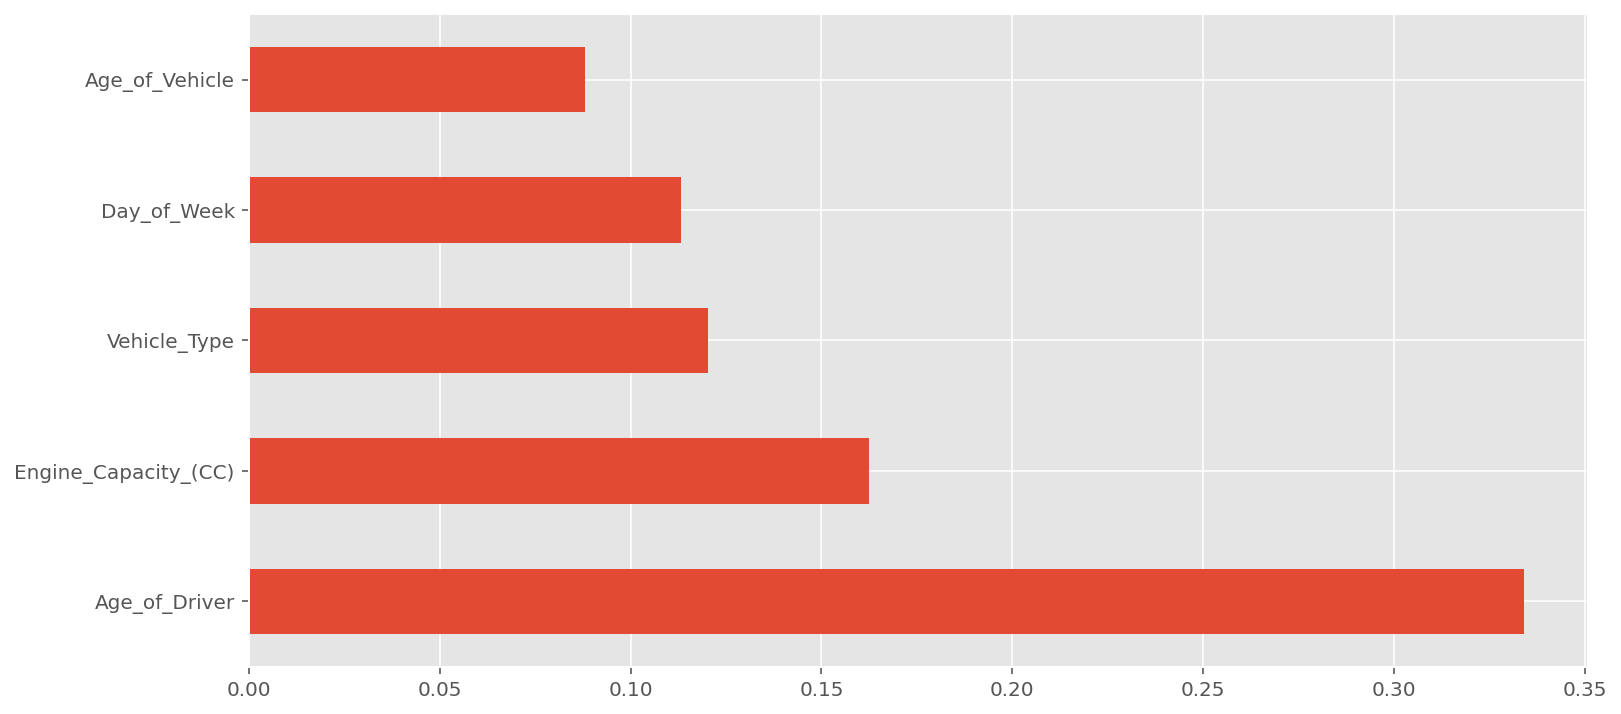

In [23]:
plt.figure(figsize=(12,6))
feat_importances = pd.Series(random_forest.feature_importances_, index=accident_ml.columns)
feat_importances.nlargest(5).plot(kind='barh')

In [24]:
rf = RandomForestClassifier()

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [25]:
Y_pred = grid_search.predict(X_test)
acc_random_forest1 = round(grid_search.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 91.67
              precision    recall  f1-score   support

           2   0.000000  0.000000  0.000000         1
           3   0.916667  1.000000  0.956522        11

    accuracy                       0.916667        12
   macro avg   0.458333  0.500000  0.478261        12
weighted avg   0.840278  0.916667  0.876812        12



Predicted,3,All
Actual,,
2,1,1
3,11,11
All,12,12


Random forest took lots of time to tune the hyperparameter. Most of the algorithm works well only with default values except decision tree.

In [27]:
import pickle
with open('model.pickle', 'wb') as f:
    pickle.dump(grid_search, f)

## Conclusion


#### Machine Learning Conclusion


#### Recommendation for Public .